Pranav Kartha
8/4/2020
PS7

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 1. Predict AirBNB Price

1.  Cleaning up the data in the listings dataset is done as follow:

In [23]:
listings = pd.read_csv("airbnb-beijing-listings.csv.bz2", usecols = ["price", "bedrooms", "bathrooms", "accommodates", "room_type", "host_is_superhost"] )
listings.price = listings.price.str[1:] #removes the $ sign from the price
listings = listings[(listings['host_is_superhost'].isin(["t","f"]))]#cleans up entries that aren't T or F 
prices = listings.price
pricenum = pd.to_numeric(prices.str.replace(',',''), errors='coerce')#Remove commas from string and convert to numeric
listings.price = pricenum
listings = listings[~(listings['price'] <= 0)] 
bedroomcats = []
for i in listings.bedrooms:
    if i == 1:
        bedroomcats.append("1")
    elif i == 2:
        bedroomcats.append("2")
    elif i == 3:
        bedroomcats.append("3")
    else:
        bedroomcats.append("4+")
listings["bedroom_cat"] = bedroomcats
listings["logprice"] = np.log(listings.price)
accomcats = []
for i in listings.accommodates:
    if i == 1:
        accomcats.append("1")
    elif i == 2:
        accomcats.append("2")
    elif i == 3:
        accomcats.append("3")
    else:
        accomcats.append("4+")
listings["acoom_cat"] = accomcats


bathcats = []
for i in listings.bathrooms:
    if i < 0.5:
        bathcats.append("0")
    elif i < 1.5:
        bathcats.append("1")
    elif i < 2.5:
        bathcats.append("2")
    else:
        bathcats.append("3+")
listings["bath_cat"] = bathcats

listings = listings.dropna()

2. The best model was the one created in section 2.6 of ps6, with includes number of bedrooms, accomodations, bathrooms, and room type , which contained the largest $R^2$ value.

In [24]:
reg_all = smf.ols(formula = "logprice ~ C(bedroom_cat) + C(acoom_cat) + C(bath_cat) + C(room_type)", data = listings).fit()
print(reg_all.summary())

                            OLS Regression Results                            
Dep. Variable:               logprice   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     2904.
Date:                Sun, 09 Aug 2020   Prob (F-statistic):               0.00
Time:                        05:02:24   Log-Likelihood:                -35815.
No. Observations:               38614   AIC:                         7.165e+04
Df Residuals:                   38602   BIC:                         7.176e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

3.

In [25]:
pred = reg_all.predict(listings)

In [26]:


print("4.")

rmse = np.sqrt(np.mean((pred-listings.logprice)**2))
print("The RMSE of this prediction is " + str(rmse))

4.
The RMSE of this prediction is 0.6117486009256589


In [27]:
x1 = {"bedroom_cat":'2', "bath_cat": '1',"acoom_cat": '4+', "room_type":'Entire home/apt'}
print("5.  The log price of a 2 bed, 1 bath apartment that accomodates 4 is " + str(reg_all.predict(x1)))

5.  The log price of a 2 bed, 1 bath apartment that accomodates 4 is 0    6.376972
dtype: float64


5. The log price of a 2 bed, 1 bath apartment that accomodates 4 is 6.3759.

# 2 Religiousness and Attitude towards women.

1.

In [28]:
survey = pd.read_csv("wvs-logit.csv.bz2" , sep = "\t")

print("2.")


lsize = survey.size
lnull = survey.isnull().sum().sum()

print("There are " + str(lsize) + " entries in the dataset.")
print("There are " + str(lnull) + " null entries in the dataset.")  

survey = survey.dropna()
survey = survey[~(survey['believeInGod'] <= 0)] 
survey = survey[~(survey['age'] <= 0)] 
survey = survey[~(survey['womanJob'] <= 0)]
survey = survey[~(survey['environmentImportant'] <= 0)]
survey.head()


print("There are "+ str(survey.size) + " entries in this dataset after cleaning the data.")
print("There are "+ str(survey.isnull().sum().sum()) + " entries in this dataset after cleaning the data.")

2.
There are 450366 entries in the dataset.
There are 1300 null entries in the dataset.
There are 442566 entries in this dataset after cleaning the data.
There are 0 entries in this dataset after cleaning the data.


3.

In [29]:
believeInGodNew = []
for i in survey["believeInGod"]:
    if i == 1:
        believeInGodNew.append(1)
    if i == 2:
        believeInGodNew.append(0)
survey["believeInGod"] = believeInGodNew




In [30]:
environmentnew = []

for i in survey["environmentImportant"]:
    if i == 6:
        environmentnew.append(0)
    if i == 5:
        environmentnew.append(1)
    if i == 4:
        environmentnew.append(2)    
    if i == 3:
        environmentnew.append(3)   
    if i == 2:
        environmentnew.append(4) 
    if i == 1:
        environmentnew.append(5)     

        
        
survey["environmentImportant"] = environmentnew



In [31]:
womannew = []



for i in survey["womanJob"]:
    if i == 3:
        womannew.append(0)
    if i == 2:
        womannew.append(1)
    if i == 1:
        womannew.append(2)    
 
        
        
survey["womanJob"] = womannew



4.The variable believeInGod is defined in the readme as a simple yes or no question, if the one taking the survey does or does not believe in God.  This could be described in more detail, such as asking the number of times a week/month one attends a religious community, or if one thinks religion outweighs science, because simply believing in a god does not tell us anything about the strength/commitment of someone to that belief.

5. Similarly to the question above, a simple yes or no question about whether agrees with the fact that having a job is the best way to be independent could be expanded to provide more information.  The survey could ask follow up questions such as "should a wife make more than her husband?" or "should a woman give up her job for her family/children?" to provide further insight on how a survey taker views the independence of women.

6.

In [32]:
godwomanreg = smf.logit(formula = "believeInGod ~ C(womanJob)", data = survey).fit()
print(godwomanreg.get_margeff(at = "mean").summary())
print("The coefficients show that those who believe that having a job is the best way for a woman to be independent generally are less religious than those who don't.  However, this does not seem to be impacted by the degree by which people hold this beleive at people with a score of 1 have a higher value coefficient than those with the score of 2. Both these values are statistically significant, with the highest P>|z| value being 0.025." )

Optimization terminated successfully.
         Current function value: 0.414840
         Iterations 6
        Logit Marginal Effects       
Dep. Variable:           believeInGod
Method:                          dydx
At:                              mean
                      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
C(womanJob)[T.1]    -0.0226      0.004     -5.639      0.000      -0.031      -0.015
C(womanJob)[T.2]    -0.0079      0.004     -2.247      0.025      -0.015      -0.001
The coefficients show that those who believe that having a job is the best way for a woman to be independent generally are less religious than those who don't.  However, this does not seem to be impacted by the degree by which people hold this beleive at people with a score of 1 have a higher value coefficient than those with the score of 2. Both these values are statistically significant, with the high

7.

In [33]:
godwomanagereg = smf.logit(formula = "believeInGod ~ C(womanJob) + age", data = survey).fit()
print(godwomanagereg.get_margeff(at = "mean").summary())

Optimization terminated successfully.
         Current function value: 0.412525
         Iterations 6
        Logit Marginal Effects       
Dep. Variable:           believeInGod
Method:                          dydx
At:                              mean
                      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
C(womanJob)[T.1]    -0.0211      0.004     -5.300      0.000      -0.029      -0.013
C(womanJob)[T.2]    -0.0051      0.004     -1.442      0.149      -0.012       0.002
age                 -0.0014   7.57e-05    -18.750      0.000      -0.002      -0.001


Since the coeffiecient for age is negative -0.0014, this means that in general, older people are less religious.

8. 

In [34]:
allreg = smf.logit(formula = "believeInGod ~ C(womanJob) + age + C(environmentImportant) + C(education) + C(continent)", data = survey).fit()
print(allreg.get_margeff(at = "mean").summary())

Optimization terminated successfully.
         Current function value: 0.366769
         Iterations 9
        Logit Marginal Effects       
Dep. Variable:           believeInGod
Method:                          dydx
At:                              mean
                                  dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
C(womanJob)[T.1]                 0.0006      0.003      0.213      0.831      -0.005       0.006
C(womanJob)[T.2]                 0.0035      0.003      1.388      0.165      -0.001       0.008
C(environmentImportant)[T.1]    -0.0055      0.007     -0.838      0.402      -0.018       0.007
C(environmentImportant)[T.2]    -0.0095      0.006     -1.565      0.118      -0.021       0.002
C(environmentImportant)[T.3]     0.0126      0.006      2.130      0.033       0.001       0.024
C(environmentImportant)[T.4]     0.0255      0.006      4.313      

a.  womanJob has the highest P>|z| score amongst all of the variables considered in this regression, meaning there is the greatest probability that this relationships is due to chance.  The impreciseness and vague nature of this question could be a factor in this measure having less conclusive results than the others.


b. Generally, people who value the environment more are more religious than those who don't.  The difference between the coefficiant of a 1 ranking vs a 5 ranking in the variable environmentImportant was 0.067.


c.  There doesn't appear to be any relation between education and religiosity.  As the value for education increases, the coefficients did not seem to follow any trend, so one cannot conclude anything from this data.  However, all the coefficents in the model were negative, suggesting that on the whole, educated people are less religious than those who aren't religious. In addition, people with a university education had the most negative coefficient.

d.  On average, Americans are the most religious, while Europeans are the least religious.

9.

In [35]:
religionpred = allreg.predict(survey)


yhat = religionpred > 0.5
accuracy = np.mean(yhat == survey.believeInGod)

print("10. The accuracy of this data set is " + str(accuracy))


10. The accuracy of this data set is 0.8543539268719242


# 3 Extra Credit

1/2

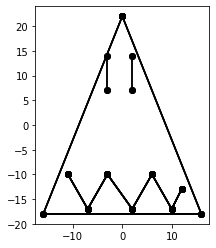

In [36]:
crazy = pd.read_csv("crazy-hat.tsv" , sep = "\t")
crazy.head()

ax = plt.subplot(1,1,1)
for g in crazy.group:
    Xg = crazy[crazy.group == g]
        # just plot multiple lines on the same canvas 
    ax.plot(Xg.iloc[:,0], Xg.iloc[:,1], marker='o', c="k")
    ax.set_aspect("equal")


2.
3.


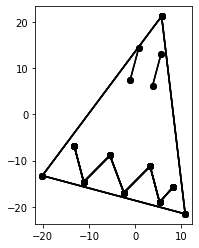

In [37]:
print("2.")
def makerotationmatrix(angle):
    return np.array([[np.cos(angle),-1 * np.sin(angle)], [np.sin(angle), np.cos(angle)]])




print("3.")


def degrees_to_radians(angle):
    return  np.pi * angle/180

def plot_figure(m, angle):
    ax = plt.subplot(1,1,1)
    for g in m.group:
        Xg = m[m.group == g]
        xgvertex = Xg[["x", "y"]]
        product = xgvertex @ makerotationmatrix(angle)
        ax.plot(product.iloc[:,0], product.iloc[:,1], marker='o', c="k")
        ax.set_aspect("equal")
        
        
        
plot_figure(crazy, degrees_to_radians(15))



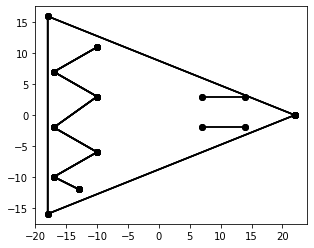

In [38]:
plot_figure(crazy, degrees_to_radians(90))

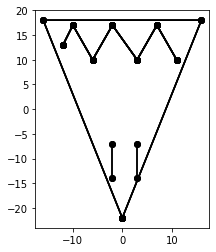

In [39]:
plot_figure(crazy, degrees_to_radians(180))

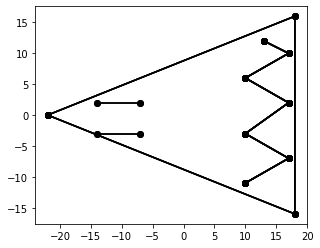

In [40]:
plot_figure(crazy, degrees_to_radians(270))